# Decision Trees

In dit notebook vind je 3 opdrachten.
- <a href="#dt_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding van het college.
- <a href="#dt_opdracht2"> Opdracht 2 </a> is optioneel, dit gaat je zeker helpen om decision trees beter te begrijpen, maar is voor dit college niet essentieel. (Het helpt je wel bij DEP, waar je zelf een decision tree gaat implementeren.)
- <a href="#dt_opdracht3"> Opdracht 3 </a> maken we in het college.

<a id ="dt_opdracht1"></a>
## Opdracht 1

We gaan aan de slag met data over woningen in New York  en San Francisco. Is op basis van de kenmerken van een woning te bepalen of deze in New York of San Francisco ligt?

We zullen eerst een voorbeeld geven - bestudeer deze goed. Daarna moet je zelf een decision tree trainen.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Classificeer de huizen in onderstaande data set met een decision tree. In de kolom `in_sf` staat een 1 als het huis in San Fransisco staat en een 0 als het huis in New York staat.

In [142]:
homes = pd.read_csv('decision_trees_homes_ny_sf.csv', sep=",")
print(f"{len(homes)} meetwaarden, waarvan {homes.in_sf.sum()} in San Fransisco")
homes.head()

492 meetwaarden, waarvan 268 in San Fransisco


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


Een voorbeeld van een simpele beslisboom wordt hieronder gegeven.

1. Kies het modeltype

In [143]:
model = DecisionTreeClassifier()

2. Kies de features en targetvariabele

In [144]:
feat_names = ['beds', 'bath']
cat_names = ['San Francisco', 'New York']
feats = np.array(homes[feat_names])
cat = homes['in_sf']

3. Maak een train- en testset

In [145]:
feats_train, feats_test, cat_train, cat_test = train_test_split(feats, cat, random_state=10)
print("{} elementen in de trainset en {} elementen in de testset".format(len(cat_train), len(feats_test)))

369 elementen in de trainset en 123 elementen in de testset


4. Train het model

In [146]:
model.fit(feats_train, cat_train)

DecisionTreeClassifier()

5. Evalueer de resultaten

In [147]:
# M.b.v. de score wordt de accuracy berekend: het percentage voorspellingen dat correct
model.score(feats_test, cat_test)

0.7642276422764228

In [148]:
# Alternatieve manier om de voorspellende waarde te berekenen is door het model de klasse te voorspellen voor
# de testset van de features en deze te vergelijken met de testset van de klassen.
cat_model = model.predict(feats_test)
accuracy_score(cat_test, cat_model)

0.7642276422764228

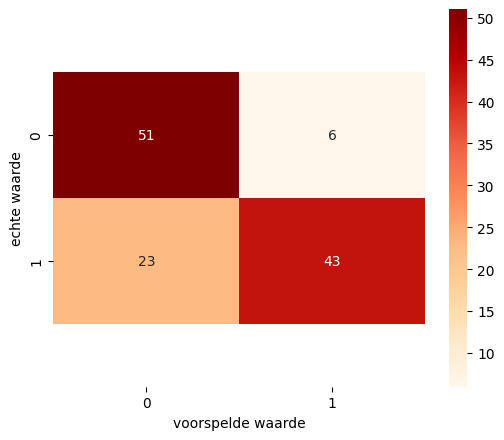

In [149]:
# Het is ook interessant om te kijken welke voorspellingen goed gaan en welke niet gaan. 
# Je ziet dat vooral de NY-huizen niet goed voorspeld worden. Dus het is zaak om onderscheidende features toe te voegen.

import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(cat_test, cat_model)

# Maak van de array een pandas dataframe om te visualiseren
df_cm = pd.DataFrame(cm)

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True, cmap='OrRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

Visualisatie van de decision tree met GraphViz.

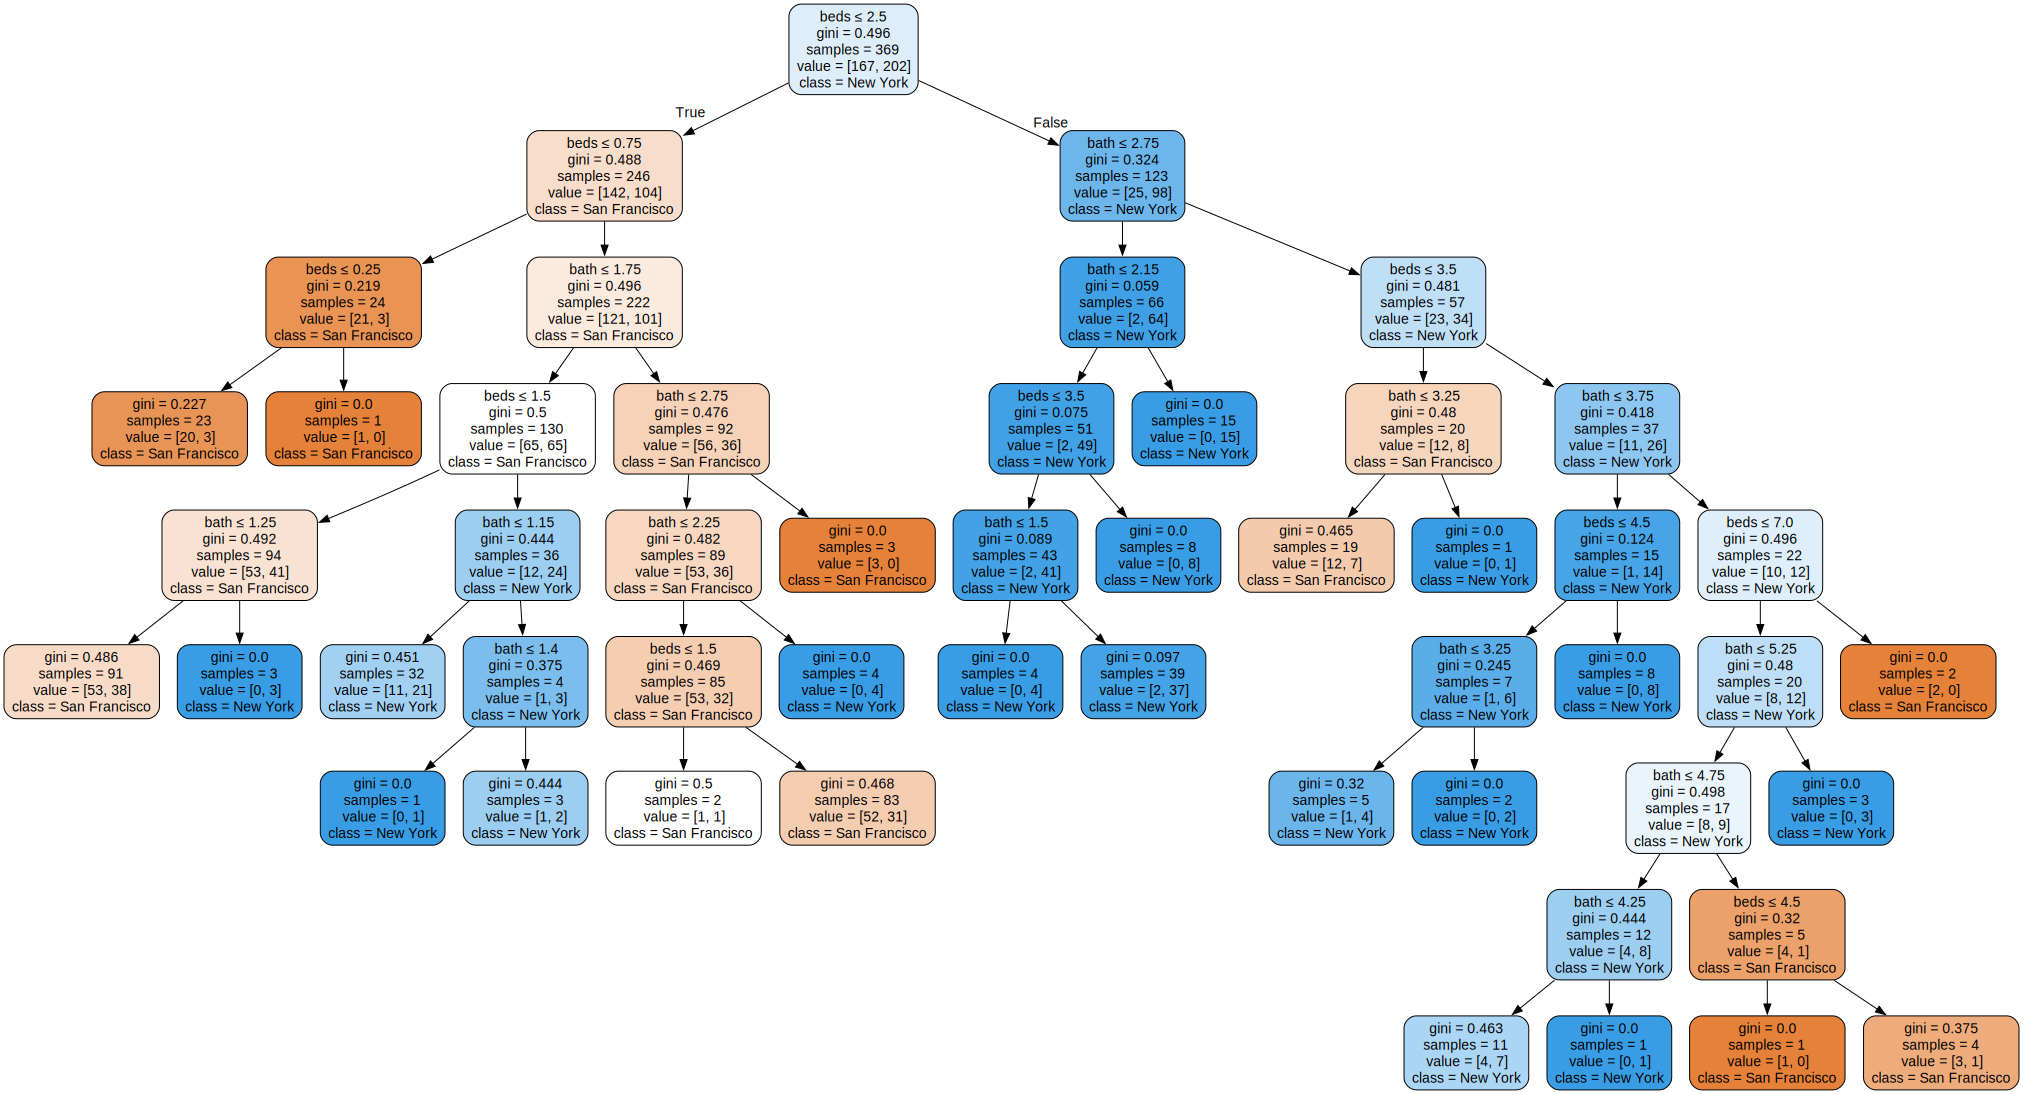

In [150]:
data = export_graphviz(model, out_file=None, feature_names=feat_names, class_names=cat_names,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

Maak nu zelf een betere beslisboom. Het is dus de bedoeling om een hogere accuracy te krijgen! 

Denk aan het toevoegen van features, aanpassen van hyperparameters, etc.

Selecteer de _features_ en de target _classes_.

In [151]:
homes.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [152]:
features = ['year_built','price_per_sqft', 'elevation']

In [153]:
target = ['in_sf']

Opdelen in een train- en een testset.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(homes[features], homes[target])

Maak een _decision tree_ model, train deze en bereken de voorspellende waarde.

In [155]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [156]:
dtc.score(X_test,y_test)

0.926829268292683

In [157]:
dtc.score(X_train, y_train)

1.0

Visualisatie van de decision tree met GraphViz.

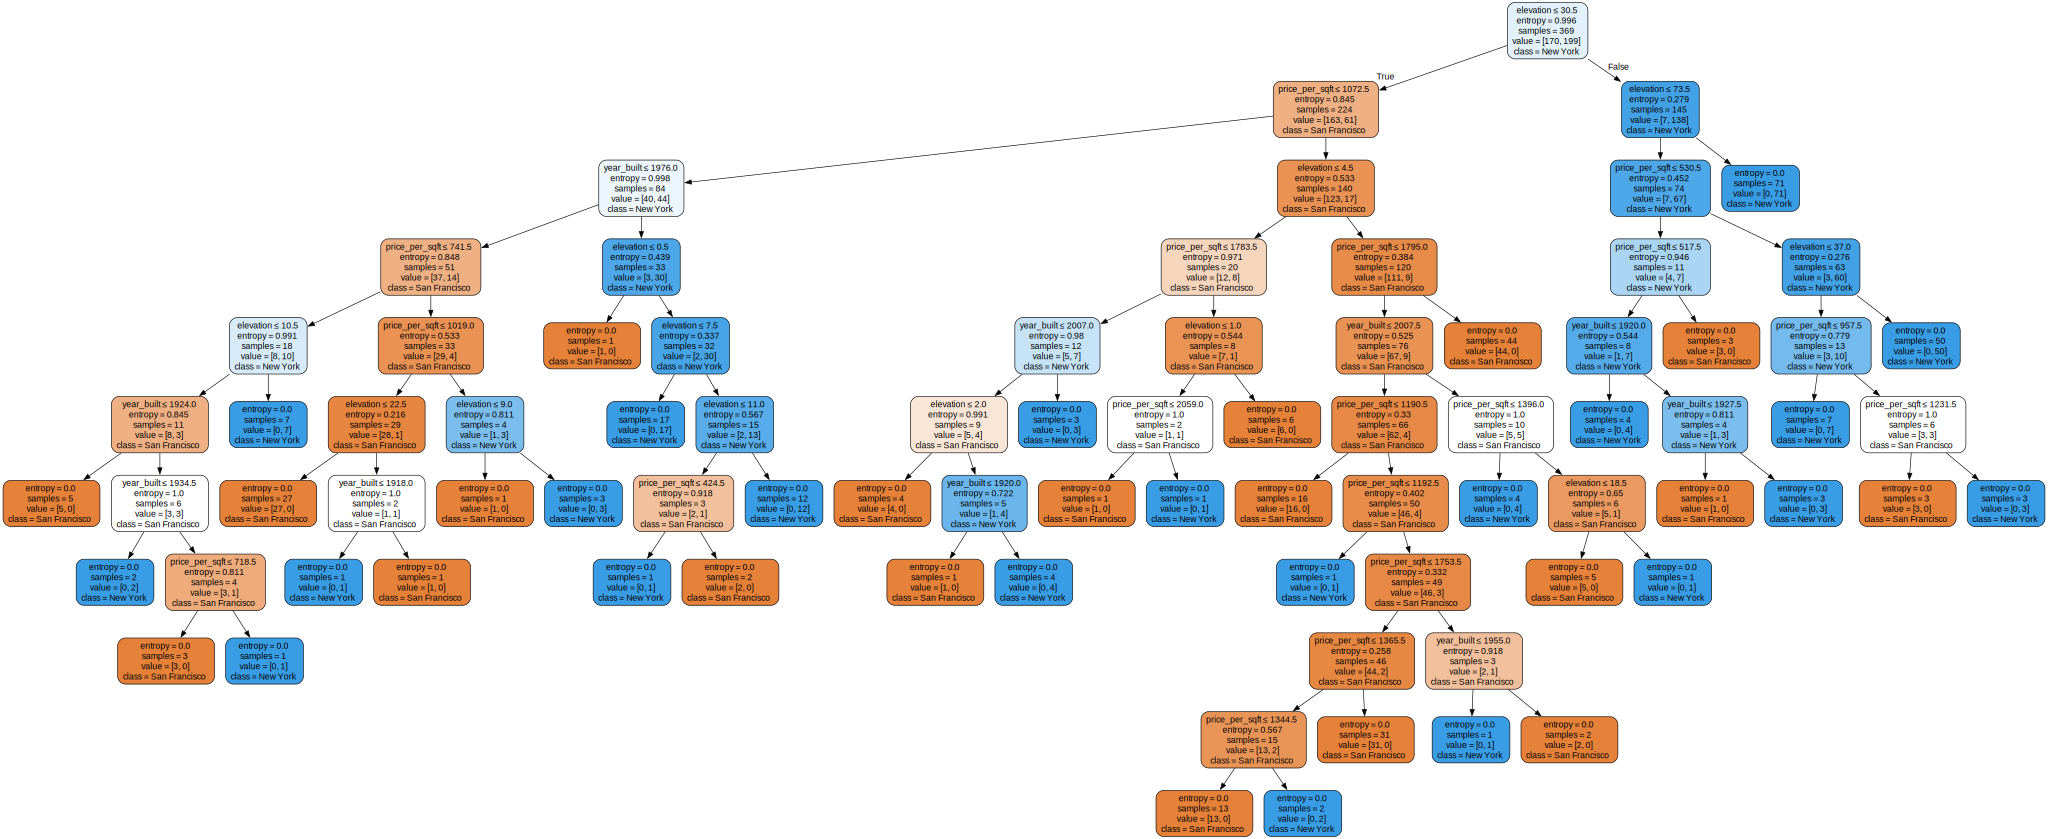

In [158]:
data = export_graphviz(dtc, out_file=None, feature_names=features, class_names=cat_names,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

Bepaal de invloed van het aantal lagen van de boom op de voorspellingsscore.

In [159]:
for max_depth in [2,3,4,5,6,7, None]:
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    dtc.fit(X_train, y_train)
    print("Met max_depth is {} is de train_accuracy: {} en de test_accuracy: {}".format(max_depth, dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Met max_depth is 2 is de train_accuracy: 0.8265582655826558 en de test_accuracy: 0.8292682926829268
Met max_depth is 3 is de train_accuracy: 0.8888888888888888 en de test_accuracy: 0.8861788617886179
Met max_depth is 4 is de train_accuracy: 0.9105691056910569 en de test_accuracy: 0.8780487804878049
Met max_depth is 5 is de train_accuracy: 0.9322493224932249 en de test_accuracy: 0.9105691056910569
Met max_depth is 6 is de train_accuracy: 0.9701897018970189 en de test_accuracy: 0.9186991869918699
Met max_depth is 7 is de train_accuracy: 0.989159891598916 en de test_accuracy: 0.9105691056910569
Met max_depth is None is de train_accuracy: 1.0 en de test_accuracy: 0.926829268292683


<a id = "dt_opdracht2"></a>
## Opdracht 2

In dit notebook wordt het onderliggende zelflerende algoritme van decision trees uitgelegd. Dit is gebaseerd op entropie. Je kunt in dit notebook zelf spelen met de werking van entropie om zo een beter gevoel te krijgen voor de werking van decision trees.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import scipy.stats as st

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
weer = pd.DataFrame({'weertype': ['slecht', 'slecht', 'slecht', 'medium', 'mooi', 'medium', 'mooi'],
                     'weerklasse': [0, 0, 0, 1, 2, 1, 2],
                     'temperatuur': [3, 18, 32, 36, 19, 7, -10], 
                     'regen': [True, True, True, False, False, False, False]})

Entropie $E(S)$:

$$E(S) = -\sum_{i=1}^{c}p_{i}\log_{2}(p_{i})$$

Als er twee klassen zijn (dus $c = 2$ mogelijke waarden voor doelvariabele $S$), dan ligt de waarde van de entropie tussen de 0 (alles behoort tot één klasse) en 1 (meetwaarden zijn precies verdeeld over de twee klassen).

NB. Als je het aandeel $p_1$ van de eerste klasse $c_1$ weet, dan weet je ook het aandeel $p_2 = 1 - p_1$ van de tweede klasse $c_2$. Bij méér dan twee klassen gaat dit natuurlijk niet meer op.

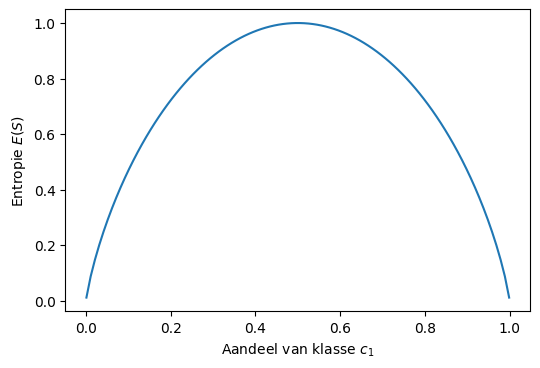

In [162]:
fig, ax = plt.subplots(1, dpi=100)

x = np.linspace(.001,.999,100)
y = -x * np.log2(x) + -(1-x) * np.log2(1-x)
ax.set_xlabel(r"Aandeel van klasse $c_1$")
ax.set_ylabel(r"Entropie $E(S)$")

plt.plot(x,y)
plt.show()

Bepaal met bovenstaande formule de entropie van doelvariabele `weertype`.

In [163]:
weer

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
2,slecht,0,32,True
3,medium,1,36,False
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [164]:
# Entropie voor weertype [slecht, medium, mooi]
# Berekening 1
E_weertype = - ((3/7) * np.log2(3/7) + (2/7) * np.log2(2/7) + (2/7) * np.log2(2/7))
E_weertype

1.5566567074628228

In [165]:
# Berekening 2
st.entropy([3,2,2], base=2)

1.556656707462823

In [166]:
# Berekening 3
st.entropy(weer.groupby('weertype').count()['weerklasse'], base=2)

1.556656707462823

### Split 1. Regen of temperatuur?

Bereken de entropie en information gain bij een split op `regen`.

In [167]:
weer_regen_false = weer[weer.regen == False]
weer_regen_false

,weertype,weerklasse,temperatuur,regen
3,medium,1,36,False
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [168]:
# Entropie bij regen = False
E_split1_regen_false = st.entropy([0,2,2], base=2)
E_split1_regen_false

1.0

In [169]:
weer[weer.regen == True]

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
2,slecht,0,32,True


In [170]:
# Entropie bij regen = True
E_split1_regen_true = st.entropy([3,0,0], base=2)
E_split1_regen_true

0.0

In [171]:
# Totale entropie na split op regen (gewogen gemiddelde)
E_split1_regen = 3/7*st.entropy([3,0,0], base=2) + 4/7*st.entropy([0,2,2], base=2)

# Information gain
gain_split1_regen = E_weertype - E_split1_regen

print(f"Entropie na een split op regen: {E_split1_regen:.2f}")
print(f"Information gain bij een split op regen: {gain_split1_regen:.2f}")

Entropie na een split op regen: 0.57
Information gain bij een split op regen: 0.99


We kunnen ook splitten op `temperatuur` op veel verschillende manieren. Bereken alleen de entropie en de information gain bij een split op `temperatuur` bij 20 graden.

In [172]:
weer[weer.temperatuur <= 20]

,weertype,weerklasse,temperatuur,regen
0,slecht,0,3,True
1,slecht,0,18,True
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [173]:
weer[weer.temperatuur > 20]

,weertype,weerklasse,temperatuur,regen
2,slecht,0,32,True
3,medium,1,36,False


In [174]:
# Totale entropie na split op 20 graden
E_split1_t20 = 5/7 * st.entropy([2,1,2], base=2) + 2/7 * st.entropy([1,1,0], base=2)
gain_split1_t20 = E_weertype - E_split1_t20

print(f"Entropie na een split op temperatuur == 20: {E_split1_t20:.2f}")
print(f"Information gain bij een split op temperatuur == 20: {gain_split1_t20:.2f}")

Entropie na een split op temperatuur == 20: 1.37
Information gain bij een split op temperatuur == 20: 0.18


Welke split is het beste?

Bij een split op regen, want de information gain is daar hoger dan bij een split op temperatuur = 20 graden. Dit geldt overigens voor alle splits op temperatuur.

### Split 2. Welke temperatuur?

Bereken ná een split op `regen` (dus als tweede laag) de entropie bij een split op `temperatuur` met de scheiding bij $t = 0$, $t = 10$ en $t = 20$ graden.

We hoeven alleen maar te kijken naar het restant van de dataset met géén regen, want het deel met wél regen heeft al een entropie van 0 en verdere opsplitsing heeft dus geen zin (verdere afname van entropie is niet mogelijk).

In [175]:
weer_regen_false

,weertype,weerklasse,temperatuur,regen
3,medium,1,36,False
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [176]:
weer_regen_false[weer_regen_false.temperatuur <= 20]

,weertype,weerklasse,temperatuur,regen
4,mooi,2,19,False
5,medium,1,7,False
6,mooi,2,-10,False


In [177]:
weer_regen_false[weer_regen_false.temperatuur > 20]

,weertype,weerklasse,temperatuur,regen
3,medium,1,36,False


In [178]:
# Entropie na split op 20 graden (split op 0 graden heeft dezelfde uitkomst)
E_split2_t20 = 3/4 * st.entropy([0,1,2], base=2) + 1/4 * st.entropy([0,1,0], base=2)
gain_split2_t20 = E_split1_regen_false - E_split2_t20

print(f"Entropie na een split op temperatuur == 20: {E_split2_t20:.2f}")
print(f"Information gain bij een split op temperatuur == 20: {gain_split2_t20:.2f}")

Entropie na een split op temperatuur == 20: 0.69
Information gain bij een split op temperatuur == 20: 0.31


In [179]:
weer_regen_false[weer_regen_false.temperatuur <= 10]

,weertype,weerklasse,temperatuur,regen
5,medium,1,7,False
6,mooi,2,-10,False


In [180]:
weer_regen_false[weer_regen_false.temperatuur > 10]

,weertype,weerklasse,temperatuur,regen
3,medium,1,36,False
4,mooi,2,19,False


In [181]:
# Entropie na split op 10 graden
E_split2_t10 = 2/4 * st.entropy([0,1,1], base=2) + 2/4 * st.entropy([0,1,1], base=2)
gain_split2_t10 = E_split1_regen_false - E_split2_t10

print(f"Entropie na een split op temperatuur == 10: {E_split2_t10:.2f}")
print(f"Information gain bij een split op temperatuur == 10: {gain_split2_t10:.2f}")

Entropie na een split op temperatuur == 10: 1.00
Information gain bij een split op temperatuur == 10: 0.00


Welke split is het beste?

Bij een split op 0 of 20 graden, want de information gain is daar hoger dan bij een split op temperatuur = 10 graden.

## Decision Tree

Maak de decision tree met `DecisionTreeClassifier`. Kies als parameter `criterion='entropy'`.

In [182]:
labels = dict(zip(weer['weerklasse'].unique(), weer['weertype'].unique()))
labels

{0: 'slecht', 1: 'medium', 2: 'mooi'}

In [183]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(weer[['regen', 'temperatuur']], weer['weerklasse'])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Visualisatie van de decision tree met GraphViz.

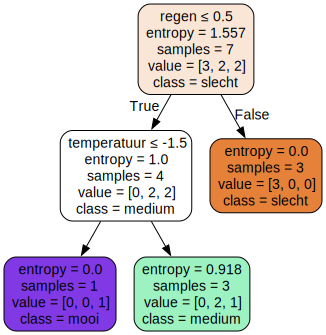

In [184]:
data = export_graphviz(model, out_file=None, feature_names=['regen', 'temperatuur'], class_names=labels,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

<a id="dt_opdracht3"></a>
## Opdracht 3 - German Credit Data

Voor deze oefening kijken we naar de data set 'german'. Deze data set bevat gegevens van een Duitse bank over mensen die een lening aanvragen. De vraag is of de bank ze deze lening wil verstrekken. Dat doet de bank alleen als er een grote kans is dat mensen de lening kunnen terugbetalen. Wij gaan hiervoor een beslisboom algoritme bouwen.

#### Initialisatie
In de cell hieronder zetten we alle statements die packages inladen netjes bij elkaar. In de loop van het college zullen we hier nog een en ander aan toe moeten voegen.

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## Data understanding
We gaan nu kijken naar de data set 'german.data'. De data staat op Canvas. Daar staat ook het data dictionary van de data set: hierin wordt uitgelegd wat de betekenis is van alle attributen.

### Opdracht 1.
Lees de data set in, bekijk de data set en krijg een eerste gevoel bij deze data. Zorg dat je in ieder geval de volgende zaken helder hebt:
- Wat zijn de meetniveau's van alle attributen?
- Zijn er attributen met *rare* waardes?

In [186]:
german = pd.read_csv('german.data', sep = ' ', quotechar = "'")

In [208]:
pd.set_option('display.max_columns', None)
german.head(10)

,Euros op rekening,Duur Lening,Leengeschiedenis,Doel vd Lening,Bedrag Lening,Bedrag op spaarrekening,Duur huidige baan,lening als perc van inkomen,persoonlijke status,overige schuldeisers,huidige woning sinds,eigendom,leeftijd,andere leningen,huisvesting,aantal leningen,baan,verantwoordelijk voor,telefoon,buitenlandse werknemer,lening terugbetaald
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35.0,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53.0,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35.0,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61.0,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28.0,A143,A152,2,A174,1,A191,A201,2


In [188]:
german.columns

Index(['Euros op rekening', ' Duur Lening ', 'Leengeschiedenis',
       'Doel vd Lening ', ' Bedrag Lening', 'Bedrag op spaarrekening',
       'Duur huidige baan', 'lening als perc van inkomen ',
       'persoonlijke status', 'overige schuldeisers', 'huidige woning sinds ',
       'eigendom', 'leeftijd ', 'andere leningen', 'huisvesting',
       'aantal leningen', 'baan', 'verantwoordelijk voor ', 'telefoon',
       'buitenlandse werknemer', 'lening terugbetaald'],
      dtype='object')

In [189]:
german.isna().sum()

Euros op rekening               0
 Duur Lening                    0
Leengeschiedenis                0
Doel vd Lening                  0
 Bedrag Lening                  0
Bedrag op spaarrekening         0
Duur huidige baan               0
lening als perc van inkomen     0
persoonlijke status             0
overige schuldeisers            0
huidige woning sinds            0
eigendom                        0
leeftijd                        2
andere leningen                 0
huisvesting                     0
aantal leningen                 0
baan                            0
verantwoordelijk voor           0
telefoon                        0
buitenlandse werknemer          0
lening terugbetaald             0
dtype: int64

In [190]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Euros op rekening             1000 non-null   object 
 1    Duur Lening                  1000 non-null   int64  
 2   Leengeschiedenis              1000 non-null   object 
 3   Doel vd Lening                1000 non-null   object 
 4    Bedrag Lening                1000 non-null   int64  
 5   Bedrag op spaarrekening       1000 non-null   object 
 6   Duur huidige baan             1000 non-null   object 
 7   lening als perc van inkomen   1000 non-null   int64  
 8   persoonlijke status           1000 non-null   object 
 9   overige schuldeisers          1000 non-null   object 
 10  huidige woning sinds          1000 non-null   int64  
 11  eigendom                      1000 non-null   object 
 12  leeftijd                      998 non-null    float64
 13  ande

In [191]:
german.describe()

,Duur Lening,Bedrag Lening,lening als perc van inkomen,huidige woning sinds,leeftijd,aantal leningen,verantwoordelijk voor,lening terugbetaald
count,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.553106,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.381445,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### Opdracht 2
Maak nu een boxplot van de leeftijd. Merk op dat standaard toepassen van plt.boxplot niet lukt als gevolg van de missende waarden in de data. Hoe kunnen we nu wel zo'n boxplot krijgen?

Trek ook conclusies over eventuele uitschieters en of we *iets* moeten doen met die uitschieters.

<AxesSubplot:>

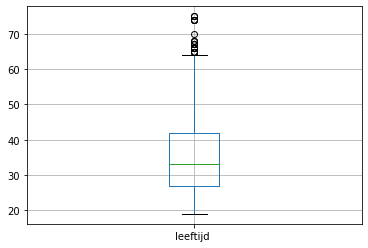

In [192]:
# het volgende commando werkt niet:
# plt.boxplot(german['leeftijd '])
# wat wel werkt:
german.boxplot('leeftijd ')
# en ook:
# plt.boxplot(german.loc[~ german['leeftijd '].isna() , 'leeftijd '])

### Opdracht 3
We gaan straks proberen een beslisboom te maken die voorspeld aan wie de bank zonder veel risico een lening kan verstrekken op basis van deze data. Probeer de target feature te vinden en maak een staafdiagram ('bar chart') voor deze feature. In dit staafdiagram moet je duidelijk kunnen aflezen hoe vaak de target feature welke waarde aanneemt. 

Text(0.5, 0, 'lening terugbetaald')

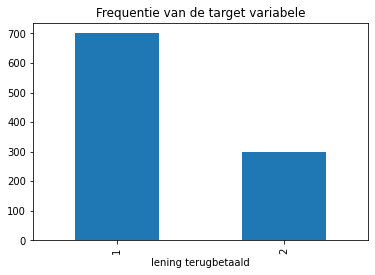

In [193]:
ax = german['lening terugbetaald'].value_counts().plot(kind = 'bar')
ax.set_title('Frequentie van de target variabele')
ax.set_xlabel('lening terugbetaald')

## Data preparation
We gaan de dataset nu klaarstomen voor een decision tree met behulp van een aantal opschoningsacties.

### Opdracht 4.
Niet alleen de waardes van een attribuut kunnen *rotzooi* bevatten, ook de attribuutnamen ofwel kolomnamen. Als er spaties in de kolomnaam staan, dan kun je niet meer gebruik maken van de dot-notatie van pandas. Kijk bijvoorbeeld maar eens naar het attribuut *leeftijd*. Bij opdracht 2. heb je waarschijnlijk al gemerkt dat de kolomnaam eigenlijk 'leeftijd ' is met een extra spatie die daar op een of andere manier ingekomen is. Waarschijnlijk bij het exporteren van een Excelsheet naar een CSV bestand... 

Anyway, dit spatie moet weg! Je kunt bijvoorbeeld niet de kolom leeftijd selecteren door german.leeftijd. Wat wel altijd werkt is het selecteren van kolommen door middel van de brackets [], bijvoorbeeld german['leeftijd ']. Maar stel dat we nu gewoon de kolomnaam van leeftijd willen hernoemen en de spatie weghalen, hoe kunnen we dit doen?

In [194]:
# Merk op:
# german.columns[12] = 'leeftijd'
# werkt niet, want columns is van data type 'Index' en dit data type is not mutable.
# Eventueel kun je wel alle kolomnamen op deze wijze veranderen. Als je echter één naam wil wijzigen,
# gebruik dan:
german.rename(columns={'leeftijd ': 'leeftijd'}, inplace = True)

In [195]:
german.columns

Index(['Euros op rekening', ' Duur Lening ', 'Leengeschiedenis',
       'Doel vd Lening ', ' Bedrag Lening', 'Bedrag op spaarrekening',
       'Duur huidige baan', 'lening als perc van inkomen ',
       'persoonlijke status', 'overige schuldeisers', 'huidige woning sinds ',
       'eigendom', 'leeftijd', 'andere leningen', 'huisvesting',
       'aantal leningen', 'baan', 'verantwoordelijk voor ', 'telefoon',
       'buitenlandse werknemer', 'lening terugbetaald'],
      dtype='object')

### Opdracht 5.a.
De laatste stap voordat we kunnen gaan modelleren is het selecteren van de juiste features. Ten eerste moeten we ons afvragen of het **ethisch verantwoord** om het attribuut te gebruiken. Maak een selectie van de attributen die wel geschikt zijn en licht toe waarom je bepaalde attributen niet geschikt vindt.

In [196]:
# Persoonlijke status is een combinatie van geslacht en burgelijke staat, vooral geslacht gebruiken is niet ethisch
# Buitenlandse afkomst meenemen is natuurlijk ook not done
german_ethisch = german.drop(['persoonlijke status', 'buitenlandse werknemer'], axis = 1)

### Opdracht 5.b.
Ten tweede moeten we kijken naar het meetniveau van de attributen: niet alle meetniveau's zijn geschikt voor een beslisboom. Het Decision Tree algoritme van sci-kit learn kan alleen kwantitatieve features aan als input en kan ook niet omgaan met missende waarden. Een mogelijke oplossing is om de rijen met missende waarden weg te laten en de kwalitatieve features om te zetten met behulp van get_dummies.

Merk op: hoewel deze oplossing niet optimaal is voor wat betreft de performance, zullen we hier nu voor kiezen. Alternatieven zijn om de beslisboom te maken in R (waar wel een standaardimplementatie is die overweg kan met categoriale features en missings) of te kiezen voor een ander python package. Voor dit laatste zijn er verschillende mogelijkheden onder andere: CatBoost, LightGBM, of H2O, maar elk ook weer met hun eigen nadelen. Zo kan CatBoost bijvoorbeeld  alleen symmetrische decision trees leren en is de visualisatie van een boom niet begrijpelijk. 

In [197]:
is_categorical = np.where(german_ethisch.dtypes == 'object')[0]
german_binary = pd.get_dummies(data = german_ethisch, columns = german_ethisch.columns[is_categorical])
german_binary

,Duur Lening,Bedrag Lening,lening als perc van inkomen,huidige woning sinds,leeftijd,aantal leningen,verantwoordelijk voor,lening terugbetaald,Euros op rekening_A11,Euros op rekening_A12,Euros op rekening_A13,Euros op rekening_A14,Leengeschiedenis_A30,Leengeschiedenis_A31,Leengeschiedenis_A32,Leengeschiedenis_A33,Leengeschiedenis_A34,Doel vd Lening _A40,Doel vd Lening _A41,Doel vd Lening _A410,Doel vd Lening _A42,Doel vd Lening _A43,Doel vd Lening _A44,Doel vd Lening _A45,Doel vd Lening _A46,Doel vd Lening _A48,Doel vd Lening _A49,Bedrag op spaarrekening_A61,Bedrag op spaarrekening_A62,Bedrag op spaarrekening_A63,Bedrag op spaarrekening_A64,Bedrag op spaarrekening_A65,Duur huidige baan_A71,Duur huidige baan_A72,Duur huidige baan_A73,Duur huidige baan_A74,Duur huidige baan_A75,overige schuldeisers_A101,overige schuldeisers_A102,overige schuldeisers_A103,eigendom_A121,eigendom_A122,eigendom_A123,eigendom_A124,andere leningen_A141,andere leningen_A142,andere leningen_A143,huisvesting_A151,huisvesting_A152,huisvesting_A153,baan_A171,baan_A172,baan_A173,baan_A174,telefoon_A191,telefoon_A192
0,6,1169,4,4,67.0,2,1,1,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True
1,48,5951,2,2,22.0,1,1,2,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False
2,12,2096,2,3,49.0,1,2,1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
3,42,7882,2,4,45.0,1,2,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False
4,24,4870,3,4,53.0,2,2,2,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31.0,1,1,1,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
996,30,3857,4,4,40.0,1,1,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True
997,12,804,4,4,38.0,1,1,1,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False
998,45,1845,4,4,23.0,1,1,2,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,T

Verwijder nu de rijen met missende waarden

In [198]:
german_nomissings = german_binary.dropna()

## Modelling
De dataset is klaar voor het decision tree algoritme.

### Opdracht 6.
Doorloop de bekende stappen om tot een beslisboom komen. Bepaal de kwaliteit van de beslisboom met de juiste metrics. Pas de hyperparameters aan om tot een zo hoog mogelijke score te komen.

In [199]:
X_train, X_test, y_train, y_test = \
train_test_split(german_nomissings.drop(['lening terugbetaald'], axis = 1), \
                 german_nomissings['lening terugbetaald'], train_size = 0.7, random_state = 42)

In [200]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [201]:
model_pred = model.predict(X_test)
np.round(accuracy_score(y_test, model_pred),3) 

0.707

In [202]:
# Itereren over een aantal hyperparameters
max_depth = 30
depths = range(max_depth)
min_leaf = [5,10,25,50]
min_split = [5,10,25,50]

best_depth = 0
best_leaf = 0
best_split = 0
highscore = 0

for depth in depths[1:]:
    for leaf in min_leaf:
        for split in min_split:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = leaf, min_samples_split = split)
            model.fit(X_train, y_train)
            model_pred = model.predict(X_test)
            score = accuracy_score(y_test, model_pred) 
            if score > highscore:
                highscore = score
                best_depth = depth
                best_leaf = leaf
                best_split = split

In [203]:
print("Highscore: ", np.round(highscore,2))
print("Best max_depth: ", best_depth)
print("Best min_leaf: ", best_leaf)
print("Best min_split: ", best_split)


Highscore:  0.77
Best max_depth:  6
Best min_leaf:  10
Best min_split:  5


### Opdracht 7.
Beargumenteer of de hoogst gevonden accuracy *goed* is of niet.

Het baseline model zegt: *"Iedereen heeft z'n lening terugbetaald."* Ofwel: 'lening terugbetaald' = 1. Je model scoort dan een accuracy van 73,3%. De gevonden accuracy van 77% is maar een kleine verbetering...

In [204]:
y_pred_baseline = np.ones(len(y_test))

In [205]:
accuracy_score(y_test, y_pred_baseline)

0.7333333333333333

### Opdracht 8.
Visualiseer tenslotte deze beslisboom. Is deze in de praktijk te gebruiken in een oplossing / applicatie? En is deze uit te leggen aan de *business* of klant?

In [206]:
model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=5)

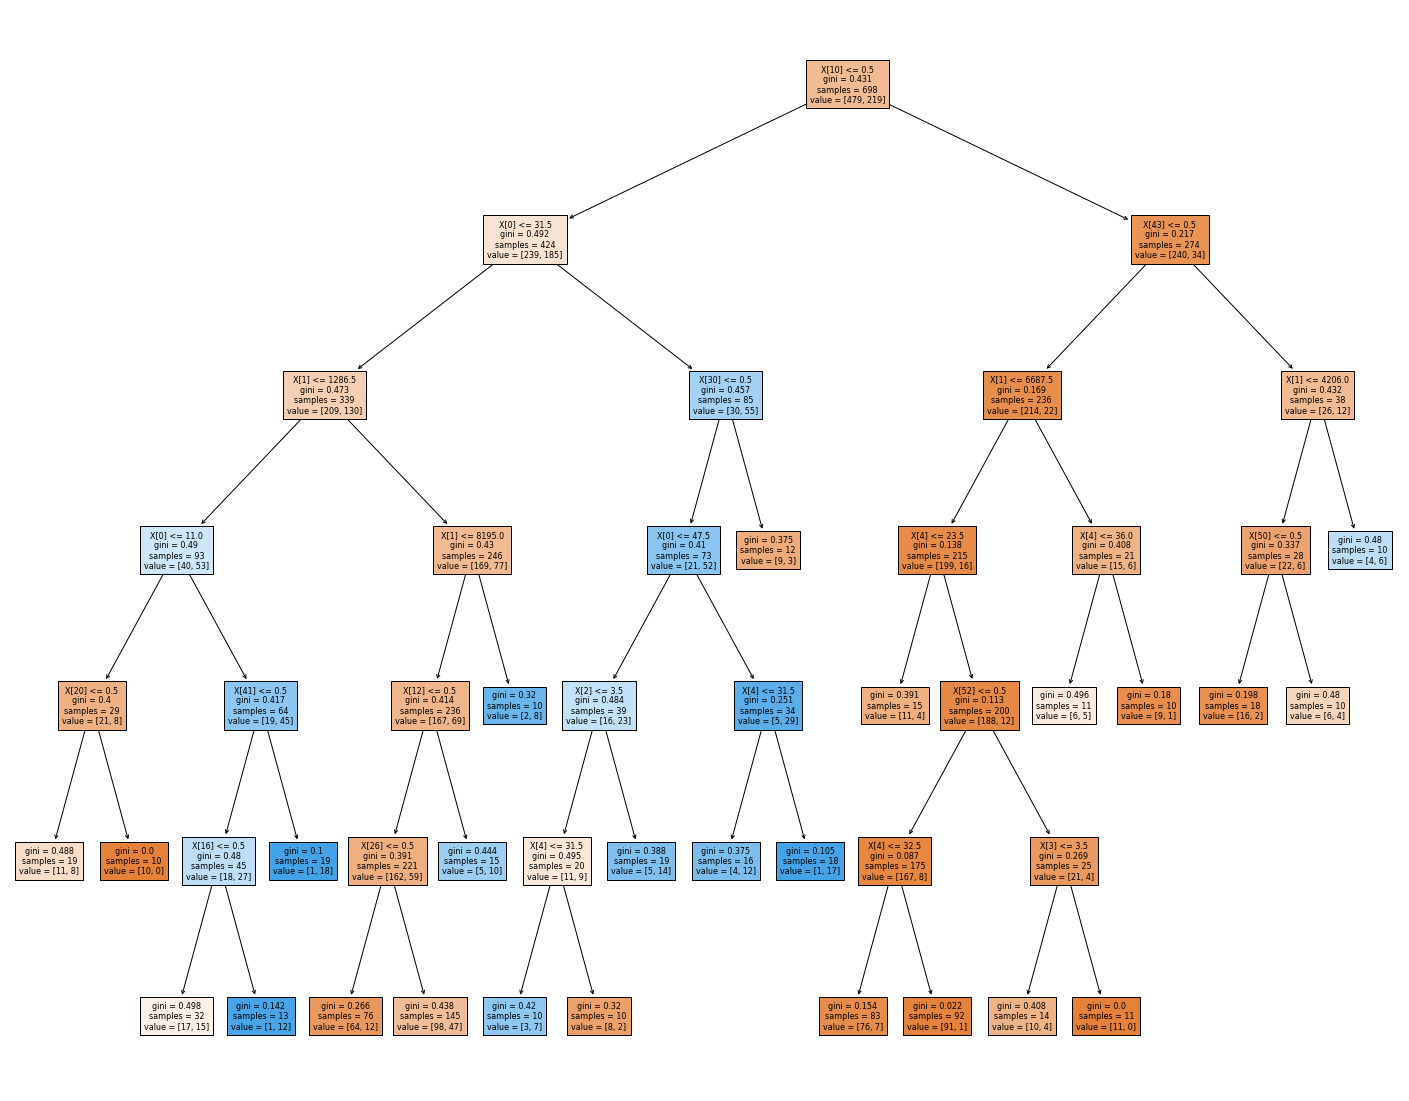

In [207]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True, fontsize = 8)